### Student Information
Name: 楊閎凱

Student ID: B11611047

GitHub ID: yhk1105

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [906]:
### Begin Assignment Here

# Read in data
import pandas as pd
data = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")


# Data exploring and cleaning

In [907]:
data

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


In [908]:
sentiment = ['nostalgia', 'not nostalgia']

In [909]:
k = 0
sentiments = dict()
for i in range(len(data.sentiment)):
    if data.sentiment[i] not in sentiments:
        k+=1
        sentiments[data.sentiment[i]] = k

In [910]:
sentiments

{'not nostalgia': 1, 'nostalgia': 2}

In [911]:
# set sentiments number
sentiment_num = []
for i in range(len(data.sentiment)):
    sentiment_num.append(sentiments[data.sentiment[i]])

In [912]:
data['sentiment_num'] = sentiment_num

In [913]:
data

,sentiment,comment,sentiment_num
0,not nostalgia,He was a singer with a golden voice that I lov...,1
1,nostalgia,The mist beautiful voice ever I listened to hi...,2
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,2
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,1
4,nostalgia,listening to his songs reminds me of my mum wh...,2
...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....",1
1496,not nostalgia,it's sad this is such a beautiful song when yo...,1
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",1
1498,nostalgia,I was born in 1954 and started to be aware of ...,2


In [914]:
data[:10][['comment', 'sentiment']]

,comment,sentiment
0,He was a singer with a golden voice that I lov...,not nostalgia
1,The mist beautiful voice ever I listened to hi...,nostalgia
2,I have most of Mr. Reeves songs. Always love ...,nostalgia
3,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia
4,listening to his songs reminds me of my mum wh...,nostalgia
5,"Every time I heard this song as a child, I use...",nostalgia
6,"My dad loved listening to Jim Reeves, when I w...",nostalgia
7,i HAVE ALSO LISTENED TO Jim Reeves since child...,nostalgia
8,Wherever you are you always in my heart,not nostalgia
9,Elvis will always be number one no one can com...,not nostalgia


In [915]:
data[-10:]

,sentiment,comment,sentiment_num
1490,not nostalgia,"He really isn't my cup of tea, but some of his...",1
1491,nostalgia,real music...how i miss those days...brings ba...,2
1492,nostalgia,i used to cry over this song cause i had a boy...,2
1493,not nostalgia,"He really has that ""love you like a brother"" l...",1
1494,not nostalgia,That's funny. But Leo really is a nice guy. He...,1
1495,not nostalgia,"i don't know!..but the opening of the video,.....",1
1496,not nostalgia,it's sad this is such a beautiful song when yo...,1
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",1
1498,nostalgia,I was born in 1954 and started to be aware of ...,2
1499,nostalgia,This is the first CD I bought after my marriag...,2


In [916]:
data.loc[:10, 'comment']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

In [917]:
# check if there is any empty data
import helpers.data_mining_helpers as dmh
data.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiment_num
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [918]:
data.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [919]:
# check duplicate
print(sum(data.duplicated('comment')))
duplicated_rows = data[data.duplicated('comment', keep=False)]
duplicated_rows

1


,sentiment,comment,sentiment_num
62,not nostalgia,never heard this song before... WOW What an am...,1
78,not nostalgia,never heard this song before... WOW What an am...,1


In [920]:
sum(data.duplicated('comment'))
duplicated_rows = data[data.duplicated('comment', keep=False)]
data.drop_duplicates(subset = 'comment',keep="first", inplace=True)

In [921]:
data.reset_index(drop=True, inplace=True) # to avoid index inconsistence
print(data.iloc[78])

sentiment                                                nostalgia
comment          How good it was back then we had it all !The M...
sentiment_num                                                    2
Name: 78, dtype: object


In [922]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

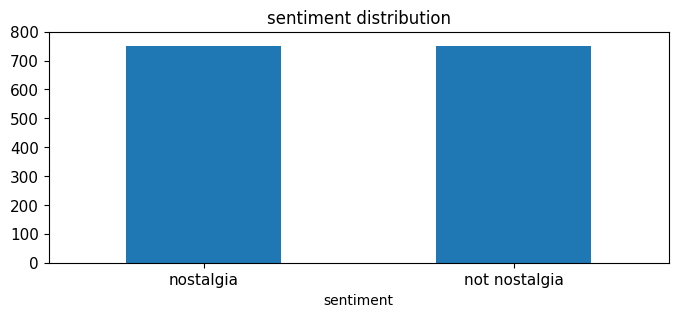

In [923]:
# plot sentiment distribution barchart
print(data.sentiment.value_counts())
upper_bound = max(data.sentiment.value_counts() + 50)

data.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sentiment
nostalgia        379
not nostalgia    371
Name: count, dtype: int64


<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

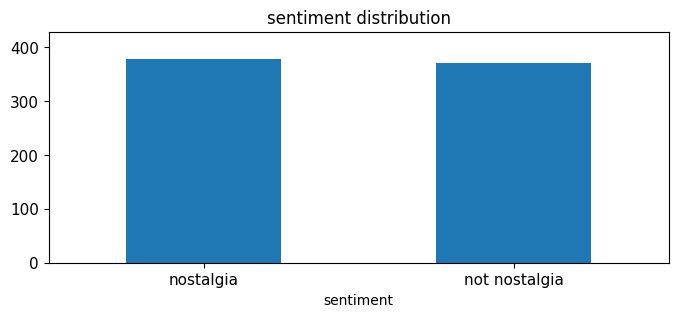

In [924]:
# sample data and plot barchart for sample
data_sample = data.sample(n = 750)
upper_bound = max(data_sample.sentiment.value_counts() + 50)
print(data_sample.sentiment.value_counts())
data_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution',
                                    ylim = [0, upper_bound],       
                                    rot = 0, fontsize = 11, figsize = (8,3))

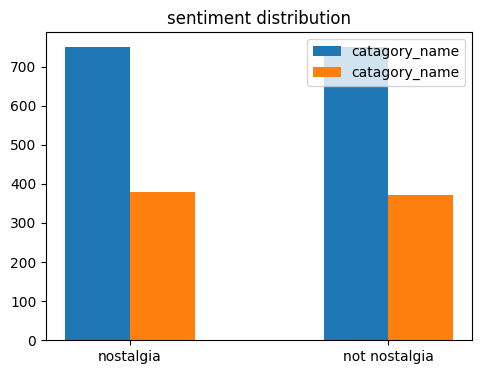

In [925]:
import numpy as np
width = 0.25 
fig, ax = plt.subplots(figsize=(5.5, 4))
x = np.arange(len(sentiment)) 
rects1 = ax.bar(x - width/2, data.sentiment.value_counts(), width, label='catagory_name')
rects2 = ax.bar(x + width/2, data_sample.sentiment.value_counts(), width, label='catagory_name')
ax.set_title('sentiment distribution')
ax.set_xticks(x)
ax.set_xticklabels(sentiment)
ax.legend()
plt.show()

In [926]:
# modify helper.py and use it to tokenize comment
import nltk
data['unigrams'] = data['comment'].apply(lambda x: dmh.tokenize_text(x))

In [928]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.comment)

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [929]:
# store the feature names in terms for future use
terms = count_vect.get_feature_names_out()

In [930]:
analyzed = []
analyze = count_vect.build_analyzer()
for i in data.comment:
    analyzed.append(analyze(i))

In [932]:
data['analyzed'] = analyzed

In [934]:
data_counts.shape

(1499, 3730)

In [935]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
plot_z = data_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

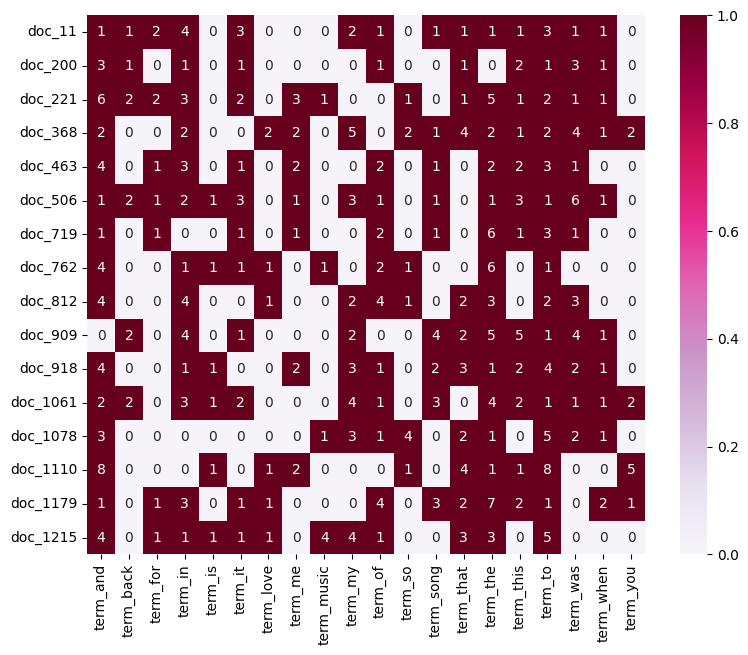

In [936]:
import seaborn as sns
document_sums = data_counts.sum(axis=1).A.ravel()  # Sum of each document's term counts
term_sums = data_counts.sum(axis=0).A.ravel().tolist()  # Sum of each term's counts across all documents
# Filter terms where the sum is greater than 250
plot_x = ["term_"+terms[i] for i in range(len(terms)) if term_sums[i] >250]
term_idx = [i for i in range(len(terms)) if term_sums[i] >250]

# Filter document where the sum is greater than 80
plot_y = ["doc_"+ str(i)  for i in range(len(data)) if document_sums[i] >80]
data_idx = [i for i in range(len(data)) if document_sums[i] >80]
plot_z = data_counts[data_idx, :][:, term_idx].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True)

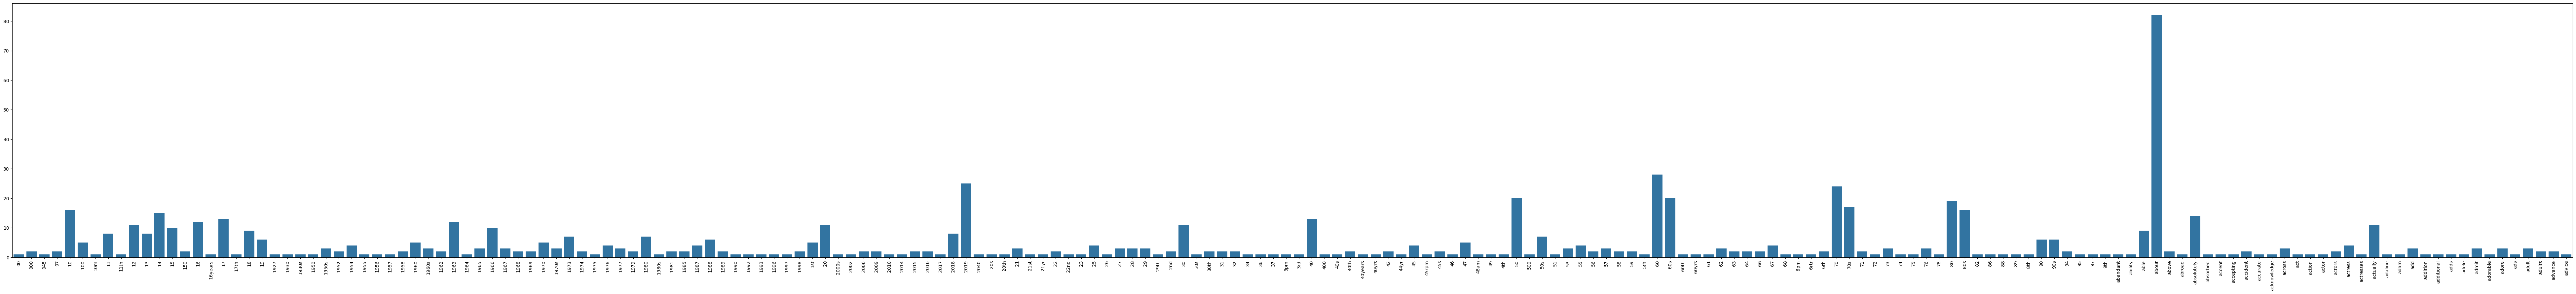

In [937]:
# plot barchart of each term frequency
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=terms[:200], y=term_sums[:200])
g.set_xticks(range(len(terms[:200])))
g.set_xticklabels(terms[:200], rotation=90);

In [938]:
# plot barchart of each term frequency with plotly
import plotly.graph_objects as go
fig = go.Figure(data=[go.Bar(x=terms[:200], y=term_sums[:200])])
fig.update_layout()
fig.show()

In [939]:
x = [terms[i] for i in range(len(term_sums)) if term_sums[i] >100]
y = [term_sums[i] for i in range(len(term_sums)) if term_sums[i] > 100]
fig = go.Figure(data=[go.Bar(x=x, y=y)])
fig.update_layout()

In [940]:

x = [terms[i] for i in range(len(term_sums)) if term_sums[i] >100]
y = [term_sums[i] for i in range(len(term_sums)) if term_sums[i] > 100]
xy_sorted = sorted(zip(x, y), key=lambda item: item[1], reverse = 1)
x, y = zip(*xy_sorted)
fig = go.Figure(data=[go.Bar(x=x, y=y)])

fig.update_layout()

fig.show()

In [941]:
# take log of original frequency
import math
term_frequencies_log = [math.log(i) for i in term_sums]
x = [terms[i] for i in range(len(term_frequencies_log)) if term_frequencies[i] >100]
y = [term_frequencies_log[i] for i in range(len(term_frequencies_log)) if term_frequencies[i] > 100]
xy_sorted = sorted(zip(x, y), key=lambda item: item[1], reverse = 1)
x, y = zip(*xy_sorted)
fig = go.Figure(data=[go.Bar(x=x, y=y)])

fig.update_layout()
fig.show()

In [942]:
sentiment_dfs = {}

for senti in sentiment:
    # Filter the original DataFrame by sentiment
    sentiment_dfs[senti] = data[data['sentiment'] == senti].copy()
# create term-document frequency DataFrame for each sentiment
def create_term_document_df(df):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df['comment'])
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each sentiment
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each sentiment

for senti in sentiment:
    term_document_dfs[senti] = create_term_document_df(sentiment_dfs[senti])

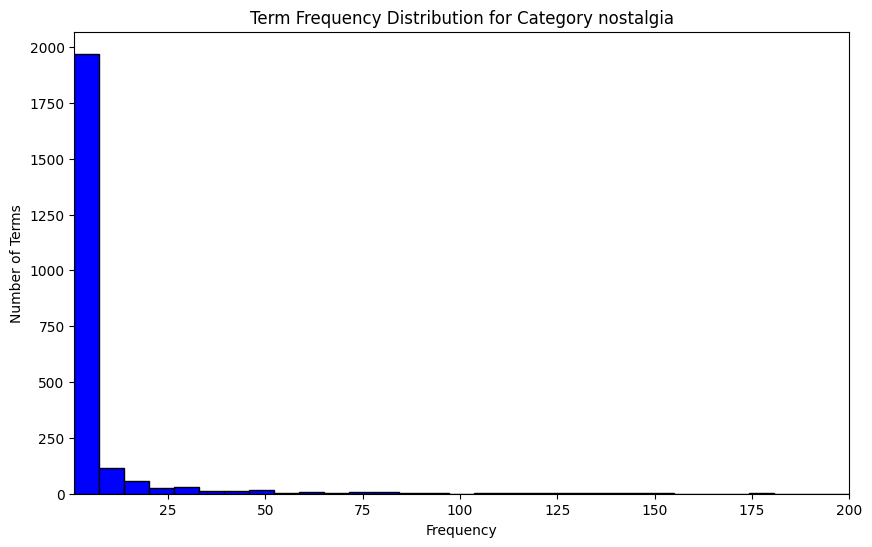

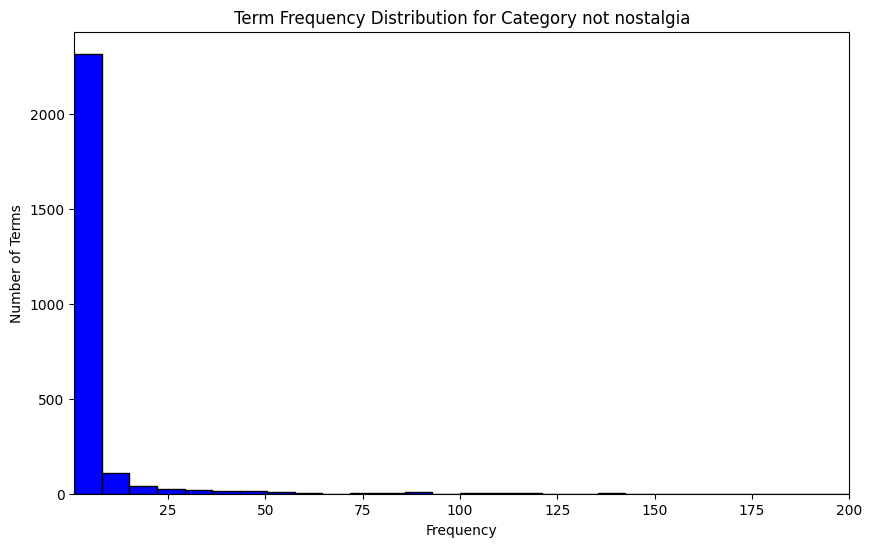

In [943]:
# plot barchart of term frequency of different sentiment
for sentiment_number in [0,1]:
    word_counts = term_document_dfs[sentiment[sentiment_number]].sum(axis=0).to_numpy()
    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=100, color='blue', edgecolor='black')
    plt.title(f'Term Frequency Distribution for Category {sentiment[sentiment_number]}')
    plt.xlabel('Frequency')
    plt.ylabel('Number of Terms')
    plt.xlim(1, 200)
    plt.show()

In [944]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0)
    sorted_words = word_sums.sort_values()
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each sentiment
filtered_term_document_dfs = {}

for senti in sentiment:
    filtered_term_document_dfs[senti] = filter_top_bottom_words_by_sum(term_document_dfs[senti])
term_document_dfs=filtered_term_document_dfs

In [945]:
term_document_dfs

{'nostalgia':      07  10  11  11th  12  13  14  15  16  17  ...  yo  yokel  younger  \
 0     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
 1     0   0   0     0   0   0   0   0   0   1  ...   0      0        0   
 2     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
 3     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
 4     0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
 ..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...  ..    ...      ...   
 745   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
 746   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
 747   0   0   0     0   0   1   0   0   0   0  ...   0      0        0   
 748   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
 749   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
 
      youngster  your  yours  youth  youthful  youtube  yrs  
 0            0     0  

In [946]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Create the DenseFormatDF object and convert to a transactional database
for senti in term_document_dfs:
    senti_safe = senti.replace(' ', '_')
    obj = db.DenseFormatDF(term_document_dfs[senti])
    obj.convert2TransactionalDatabase(f'td_freq_db_{senti_safe}.csv', '>=', 1)

nostalgia Result
Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001
not nostalgia Result
Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


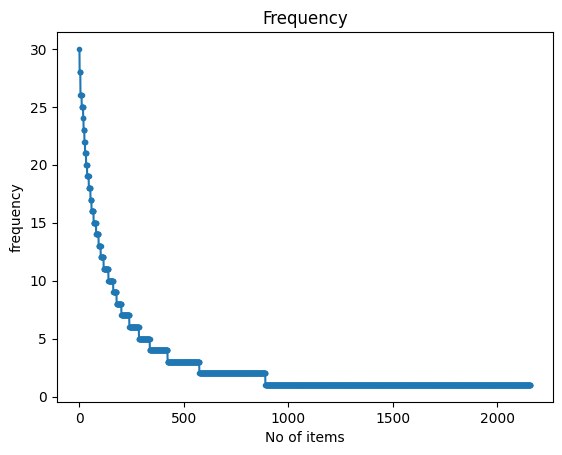

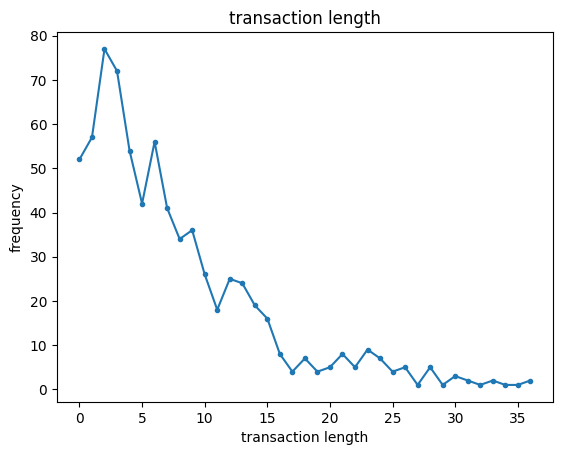

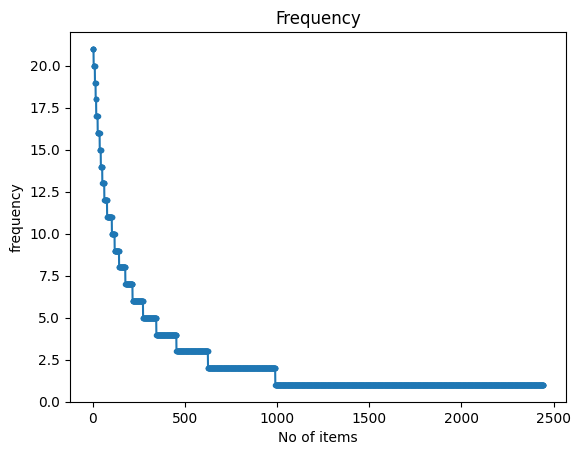

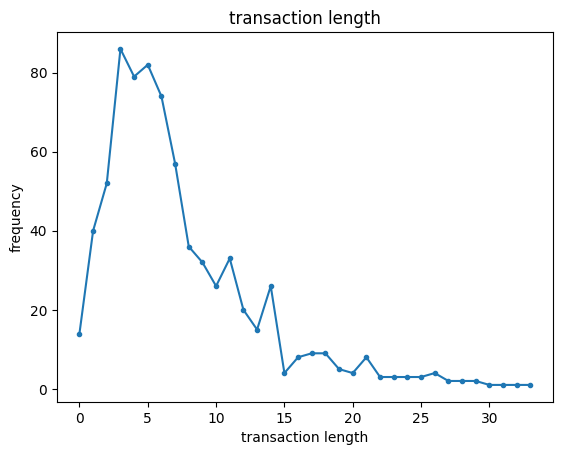

In [947]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
# plot each transactional database
for senti in term_document_dfs:
    print(f"{senti} Result")
    senti_safe = senti.replace(' ', '_')
    obj = tds.TransactionalDatabase(f'td_freq_db_{senti_safe}.csv')
    obj.run()
    obj.printStats()
    obj.plotGraphs()

# Finding frequent term using FPGrowth, topK, and MaxFPGrowth

In [948]:
from PAMI.frequentPattern.basic import FPGrowth as alg
# find frequent pattern in each sentiment with fpgrowth
frequentPatternsDF={}
for senti in sentiment:
    senti_safe = senti.replace(' ', '_')
    minSup=3
    obj1 = alg.FPGrowth(iFile=f'td_freq_db_{senti_safe}.csv', minSup=minSup)
    obj1.mine()
    frequentPatternsDF[senti_safe]= obj1.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF[senti_safe]))) 
    print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
    obj1.save(f'freq_patterns_{senti_safe}_minSup3.txt') #save the patterns
    print(frequentPatternsDF[senti_safe])

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 948
Runtime: 0.016916990280151367
          Patterns  Support
0           forgot        3
1               mr        3
2       appreciate        3
3            death        3
4        death jim        3
..             ...      ...
943          would       28
944           will       28
945  will favorite        3
946             go       28
947       favorite       30

[948 rows x 2 columns]
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 730
Runtime: 0.012259960174560547
         Patterns  Support
0       emotional        3
1             fan        3
2              30        3
3        blessing        3
4        december        3
..            ...      ...
725       classic       21
726          them       21
727    them every        4
728        lyrics       21
729  lyrics every        3

[730 rows x 2 columns]


In [950]:
pattern_support = {}
for df in frequentPatternsDF.values():
    for i in range(len(df)):
        if df['Patterns'][i] not in pattern_support:
            pattern_support[df['Patterns'][i]] = int(df['Support'][i])
        elif pattern_support[df['Patterns'][i]] >= 0:
            pattern_support[df['Patterns'][i]] *= -1
        
# find patterns only appear in one of the two sentiments
final_pattern_df = [[pattern,support] for pattern, support in pattern_support.items() if support >= 0]
total_patterns_count = sum(len(df) for df in frequentPatternsDF.values())
discarded_patterns_count = total_patterns_count - len(final_pattern_df)
final_pattern_df = pd.DataFrame(final_pattern_df, columns = ["Patterns","Support"])
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

In [951]:
print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")

              Patterns  Support
634               will       28
632               ever       28
633              would       28
629               wish       26
618                kid       26
...                ...      ...
420          make them        3
421       hearing away        3
422       missed today        3
424   country favorite        3
1053      lyrics every        3

[1054 rows x 2 columns]
Number of patterns discarded: 624


In [953]:
data

,sentiment,comment,sentiment_num,unigrams,analyzed
0,not nostalgia,He was a singer with a golden voice that I lov...,1,"[He, was, a, singer, with, a, golden, voice, t...","[he, was, singer, with, golden, voice, that, l..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,2,"[The, mist, beautiful, voice, ever, I, listene...","[the, mist, beautiful, voice, ever, listened, ..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,2,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","[have, most, of, mr, reeves, songs, always, lo..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,1,"[30, day, leave, from, 1st, tour, in, Viet, Na...","[30, day, leave, from, 1st, tour, in, viet, na..."
4,nostalgia,listening to his songs reminds me of my mum wh...,2,"[listening, to, his, songs, reminds, me, of, m...","[listening, to, his, songs, reminds, me, of, m..."
...,...,...,...,...,...
1494,not nostalgia,"i don't know!..but the opening of the video,.....",1,"[i, do, n't, know, !, .., but, the, opening, o...","[don, know, but, the, opening, of, the, video,..."
1495,not nostalgia,it's sad this is such a beautiful song when yo...,1,"[it, 's, sad, this, is, such, a, beautiful, so...","[it, sad, this, is, such, beautiful, song, whe..."
1496,not nostalgia,"Dear Friend, I think age and time is not that ...",1,"[Dear, Friend, ,, I, think, age, and, time, is...","[dear, friend, think, age, and, time, is, not,..."
1497,nostalgia,I was born in 1954 and started to be aware of ...,2,"[I, was, born, in, 1954, and, started, to, be,...","[was, born, in, 1954, and, started, to, be, aw..."


In [954]:
# augment unique patterns and original token
data['tokenized_text'] = data['comment'].str.replace(";", "").str.replace("!", "").str.replace(",", "").str.replace(".", "").str.lower().str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=data.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = data['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

tdm_df = pd.DataFrame(data_counts.toarray(), columns=terms, index=data.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,later year,later has,later since,make where,make cry,make them,hearing away,missed today,country favorite,lyrics every
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [955]:
from PAMI.frequentPattern.topk import FAE  as alg
frequentPatternsDF={}
# find frequent pattern in each sentiment with topK
for senti in sentiment:
    senti_safe = senti.replace(' ', '_')
    k = 800
    obj1 = alg.FAE(iFile=f'td_freq_db_{senti_safe}.csv', k=k)
    obj1.mine()
    frequentPatternsDF[senti_safe]= obj1.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF[senti_safe])))
    print('Runtime: ' + str(obj1.getRuntime()))
    obj1.save(f'freq_patterns_{senti_safe}_ktop500.txt')
    print(frequentPatternsDF[senti_safe])

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 800
Runtime: 0.22530889511108398
         Patterns  Support
0        favorite       30
1            ever       28
2           would       28
3            will       28
4              go       28
..            ...      ...
795      over get        3
796  over country        3
797    over which        3
798      over pop        3
799  over perfect        3

[800 rows x 2 columns]
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 800
Runtime: 0.16355109214782715
       Patterns  Support
0         elvis       21
1         every       21
2         loved       21
3       classic       21
4          them       21
..          ...      ...
795  difference        2
796        nine        2
797        slap        2
798     naughty        2
799       needs        2

[800 rows x 2 columns]


In [956]:
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg
frequentPatternsDF={}
# find frequent pattern in each sentiment with MaxFPGrowth
for senti in sentiment:
    senti_safe = senti.replace(' ', '_')
    minimumsupportcount = 3
    obj1 = alg.MaxFPGrowth(iFile=f'td_freq_db_{senti_safe}.csv', minSup = minimumsupportcount)
    obj1.mine()
    frequentPatternsDF[senti_safe]= obj1.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatternsDF[senti_safe])))
    print('Runtime: ' + str(obj1.getRuntime()))
    obj1.save(f'freq_patterns_{senti_safe}_max3.txt')
    print(frequentPatternsDF[senti_safe])

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 682
Runtime: 0.021032094955444336
           Patterns  Support
0          skating         3
1           walker         3
2            scott         3
3          17 1987         3
4             stop         3
..              ...      ...
677      will such         4
678      ever only         3
679     would only         4
680       ever kid         3
681  favorite will         3

[682 rows x 2 columns]
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 592
Runtime: 0.015987873077392578
          Patterns  Support
0          thinks         3
1          months         3
2       currently         3
3            kids         3
4            wait         3
..             ...      ...
587          days        20
588  every lyrics         3
589    every them         4
590       classic        21
591         loved        21

[592 rows x

In [957]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

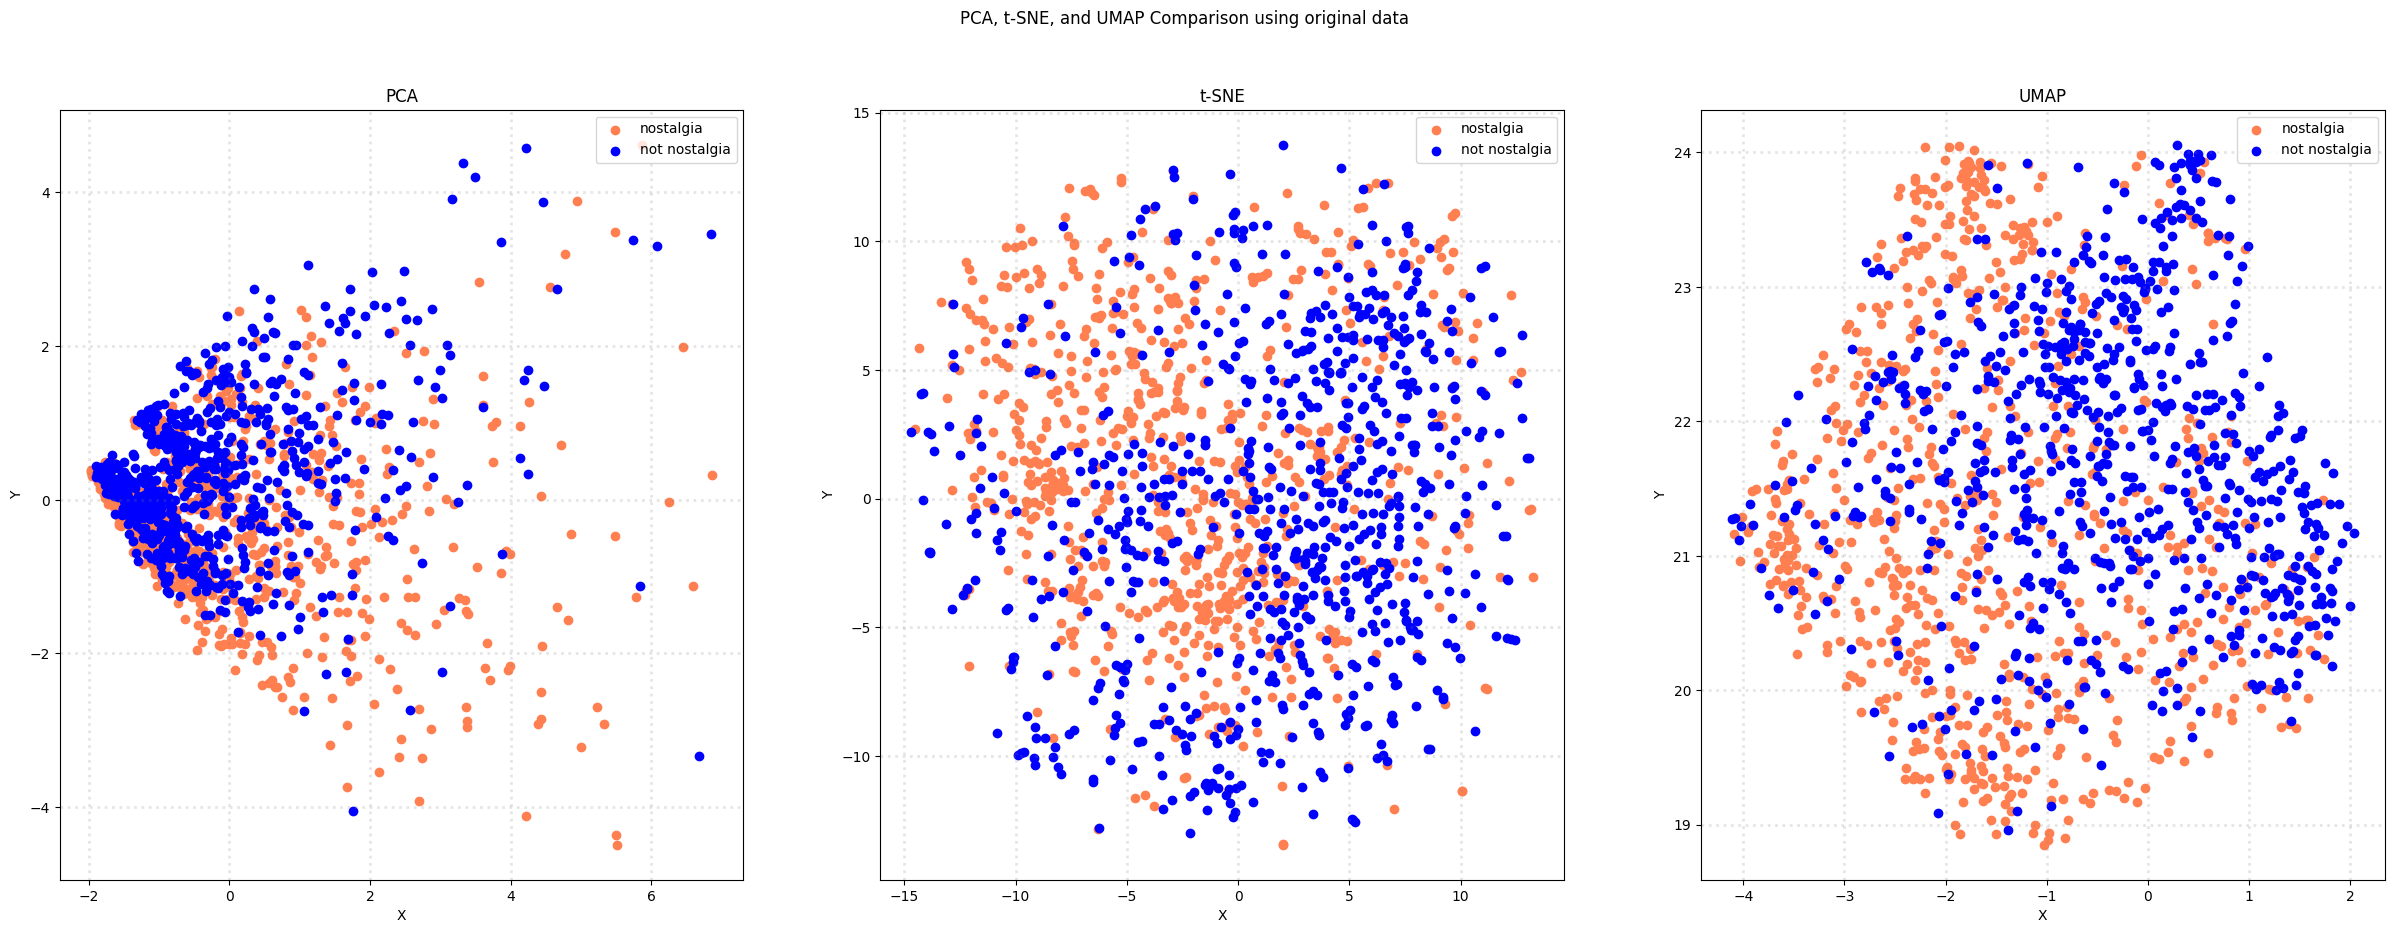

In [958]:
col = ['coral', 'blue']

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison using original data')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, senti in zip(col, sentiment):
        xs = X_reduced[data['sentiment'] == senti].T[0]
        ys = X_reduced[data['sentiment'] == senti].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=senti)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

# Findings of plots
 - PCA: The "nostalgia" and "not nostalgia" groups are a little mixed, but there is a visible cluster where the "not nostalgia" points are mainly on the left side.However, the clusters are more compact compared to t-SNE and UMAP.
 - UMAP: UMAP also provides a clearer distinction between the two groups, though there is still some overlap in certain regions.
 - t-SNE: T-SNE provides the best separation between the two groups, although some overlap still exists. The "not nostalgia" group forms distinct clusters.

In [959]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

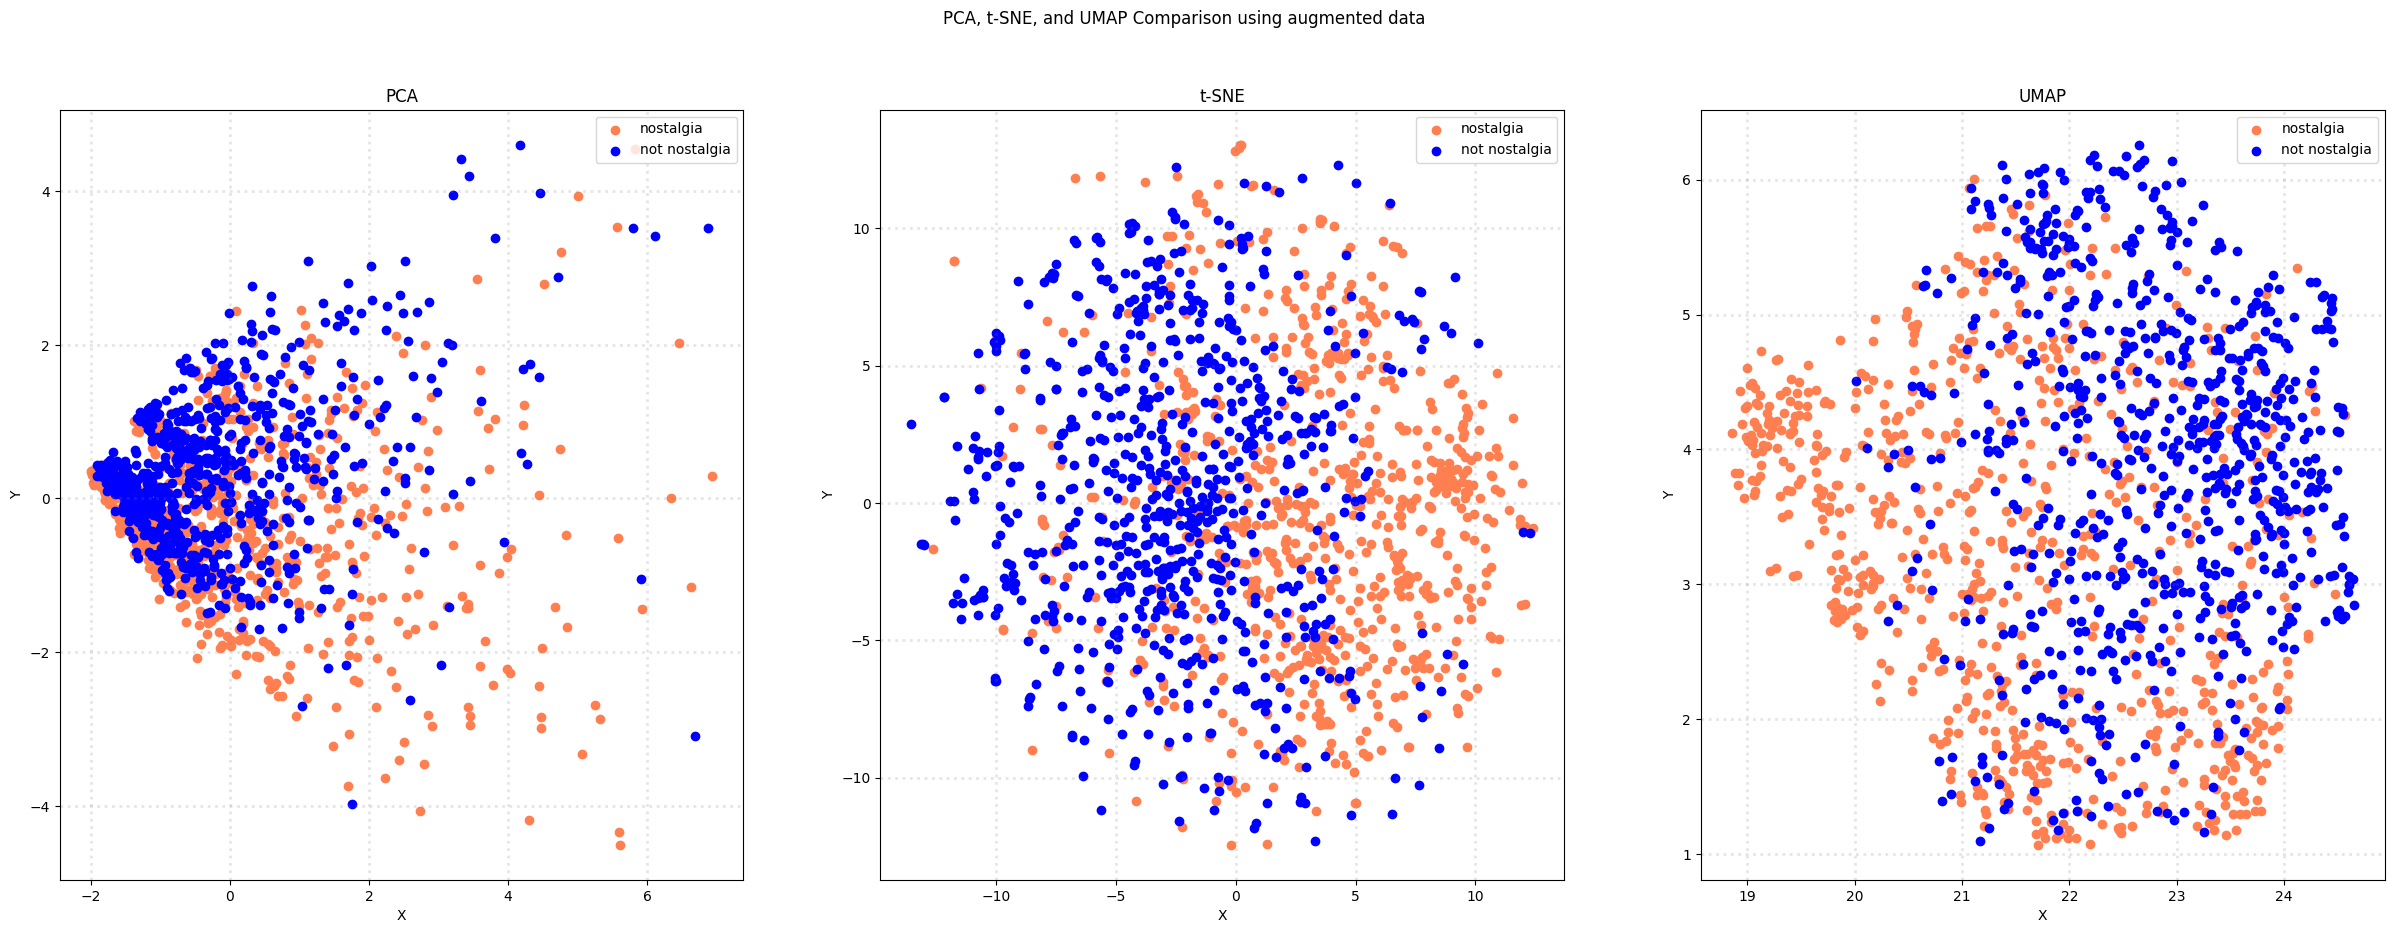

In [960]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison using augmented data')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

# Findings of plots
- PCA: The cluster result looks the same as original data's PCA result.
- t-SNE: The "nostalgia" data clustered better at the bottom right of the plot, while the "not nostalgia" data clustered better at the top right of the plot.
- UMAP: The "nostalgia" data and "not nostalgia" data seperates the best among these three plots. We can find out that there is no "not nostalgia" data appearing at the left edge.

In [961]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

In [962]:
def create_plotly_3d_scatter(X_reduced, title):
    fig = go.Figure()
    for c, senti in zip(col, sentiment):
        mask = data['sentiment'] == senti
        fig.add_trace(go.Scatter3d(
            x=X_reduced[mask, 0],
            y=X_reduced[mask, 1],
            z=X_reduced[mask, 2],
            mode='markers',
            marker=dict(size=5, color=c),
            name=senti
        ))

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        margin=dict(l=0, r=0, b=0, t=30) 
    )
    
    return fig

fig_pca = create_plotly_3d_scatter(X_pca_aug, "PCA")
fig_tsne = create_plotly_3d_scatter(X_tsne_aug, "t-SNE")
fig_umap = create_plotly_3d_scatter(X_umap_aug, "UMAP")

fig_pca.show()
fig_tsne.show()
fig_umap.show()


# Findings of plots
 - PCA: The 3D plot shows the "nostalgia" and "not nostalgia" groups are clearly separated.
 - t-SNE: The two data sets formed a ball shape. Meanwhile, by observing from some angels, we can find out that the two data are distinctly distributed at the two different sides of the ball.
 - UMAP: The 3D plot shows the "nostalgia" and "not nostalgia" groups are separated, but the "nostalgia" data appears at the top side.


In [963]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(data.sentiment)
data['bin_sentiment'] = mlb.transform(data['sentiment']).tolist()

In [964]:
data

,sentiment,comment,sentiment_num,unigrams,analyzed,tokenized_text,bin_sentiment
0,not nostalgia,He was a singer with a golden voice that I lov...,1,"[He, was, a, singer, with, a, golden, voice, t...","[he, was, singer, with, golden, voice, that, l...","{can, all, life, thank, the, many, relaxed, 16...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,2,"[The, mist, beautiful, voice, ever, I, listene...","[the, mist, beautiful, voice, ever, listened, ...","{never, the, when, kid, still, of, singing, ev...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,2,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","[have, most, of, mr, reeves, songs, always, lo...","{job, never, it, the, sounds, had, comforting,...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,1,"[30, day, leave, from, 1st, tour, in, Viet, Na...","[30, day, leave, from, 1st, tour, in, viet, na...","{can, all, are, life, some, thank, from, the, ...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,2,"[listening, to, his, songs, reminds, me, of, m...","[listening, to, his, songs, reminds, me, of, m...","{who, listening, me, of, everyday, played, him...",[0]
...,...,...,...,...,...,...,...
1494,not nostalgia,"i don't know!..but the opening of the video,.....",1,"[i, do, n't, know, !, .., but, the, opening, o...","[don, know, but, the, opening, of, the, video,...","{painter, the, on, that, of, that!he's, himwou...",[1]
1495,not nostalgia,it's sad this is such a beautiful song when yo...,1,"[it, 's, sad, this, is, such, a, beautiful, so...","[it, sad, this, is, such, beautiful, song, whe...","{it's, when, tell, such, really, someone, is, ...",[1]
1496,not nostalgia,"Dear Friend, I think age and time is not that ...",1,"[Dear, Friend, ,, I, think, age, and, time, is...","[dear, friend, think, age, and, time, is, not,...","{it, glad, when, friend, that, think, i, comes...",[1]
1497,nostalgia,I was born in 1954 and started to be aware of ...,2,"[I, was, born, in, 1954, and, started, to, be,...","[was, born, in, 1954, and, started, to, be, aw...","{never, it, or, the, born, many, 5, be, even, ...",[0]


# Test cosine similarity

In [965]:
# Retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [966]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)


In [967]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2)[0, 0]
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3)[0, 0]
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3)[0, 0]

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1)[0, 0]
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2)[0, 0]
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3)[0, 0]

# Print 
print("Cosine Similarity using count bw 1 and 2: %.6f" % cos_sim_count_1_2)
print("Cosine Similarity using count bw 1 and 3: %.6f" % cos_sim_count_1_3)
print("Cosine Similarity using count bw 2 and 3: %.6f" % cos_sim_count_2_3)

print("Cosine Similarity using count bw 1 and 1: %.6f" % cos_sim_count_1_1)
print("Cosine Similarity using count bw 2 and 2: %.6f" % cos_sim_count_2_2)
print("Cosine Similarity using count bw 3 and 3: %.6f" % cos_sim_count_3_3)


Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Train the Naive Bayes classifier

In [968]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [969]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, data['sentiment_num'], test_size=0.3, random_state=42)
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=sentiment, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.9389    0.7788    0.8514       217
not nostalgia     0.8222    0.9528    0.8827       233

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [970]:
X_train, X_test, y_train, y_test = train_test_split(augmented_df, data['sentiment'], test_size=0.3, random_state=42)
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=sentiment, digits=4))

Accuracy: 0.8866666666666667

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8473    0.9528    0.8970       233
not nostalgia     0.9415    0.8157    0.8741       217

     accuracy                         0.8867       450
    macro avg     0.8944    0.8842    0.8855       450
 weighted avg     0.8927    0.8867    0.8859       450



# Part 3

# New data visualizations
#### Draw word cloud

In [971]:
nostalgia = data[data['sentiment'] == 'nostalgia']
not_nostalgia = data[data['sentiment'] == 'not nostalgia']

In [972]:
def plot_wordcloud(train):
    from wordcloud import WordCloud
    comment = ' '.join([' '.join(words) for words in train['analyzed']])
    wordcloud = WordCloud(width=800, height=800,
                          background_color='black',
                          min_font_size=10, collocations=False).generate(comment)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

Nostalgia


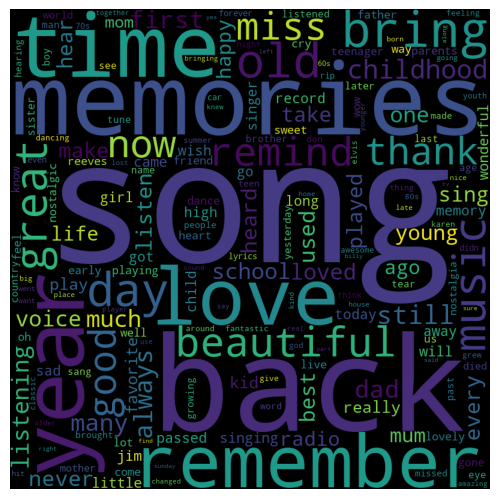

In [973]:
print("Nostalgia")
plot_wordcloud(nostalgia)

Not Nostalgia


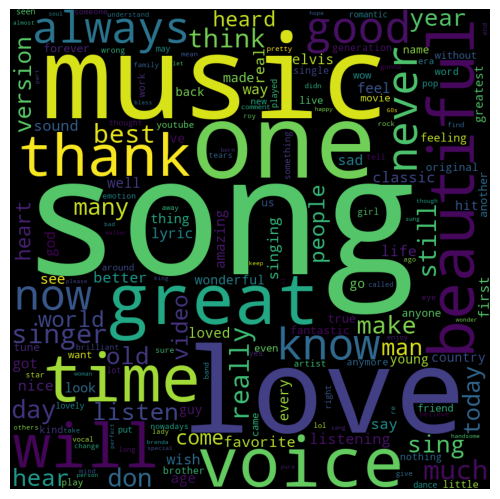

In [974]:
print("Not Nostalgia")
plot_wordcloud(not_nostalgia)

# Findings of the word clouds
We can find out that the word "back", "memories", and "remember" are the words that often appear in nostalgia comments. The three words are all somewhat related to the past which fits our imagination of nostalgia.

#### Draw the sentiment score box plot of two sentiments

In [975]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Analyze sentiment score
nltk.download('vader_lexicon')
sent = SentimentIntensityAnalyzer()

polarity1 = [round(sent.polarity_scores(i)['compound'], 2) for i in nostalgia['comment']]
polarity2 = [round(sent.polarity_scores(i)['compound'], 2) for i in not_nostalgia['comment']]

nostalgia = nostalgia.copy()
not_nostalgia = not_nostalgia.copy()

nostalgia.loc[:, 'sentiment_score'] = polarity1
not_nostalgia.loc[:, 'sentiment_score'] = polarity2


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yhk/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/var/folders/wt/6hl8qhss3jz9zrdh6n8f3_qh0000gn/T/ipykernel_44894/1097542557.py:8: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



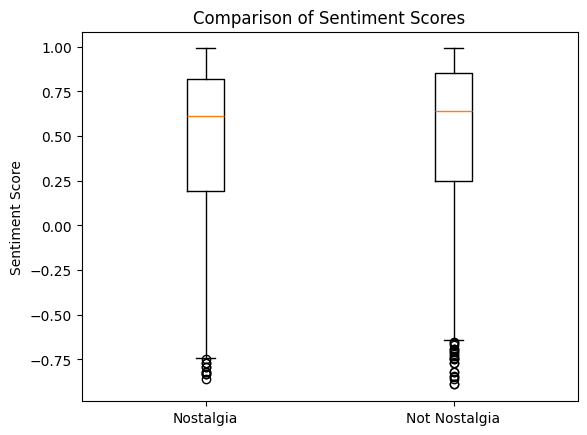

In [976]:
# Draw box plot
nostalgia_scores = nostalgia.loc[:, 'sentiment_score']
not_nostalgia_scores = not_nostalgia.loc[:, 'sentiment_score']

data1 = [nostalgia_scores, not_nostalgia_scores]
tick_labels = ['Nostalgia', 'Not Nostalgia']

plt.boxplot(data1, labels=labels)
plt.ylabel('Sentiment Score')
plt.title('Comparison of Sentiment Scores')
plt.show()


# Generate TF-IDF features

In [977]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data["comment"])
terms1 = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=terms1)
print(tfidf_df)

       00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...       ...   
1494  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1498  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

      youth  youthful  yout

# Use TF-IDF to generate classifier
Multinomial Naive Bayes is typically used with count-based features, as it calculates probabilities based on word frequencies, which are natural numbers. However, since TF-IDF produces decimal values instead of integers, a different approach is needed. In this case, Gaussian Naive Bayes is more appropriate for handling the continuous nature of TF-IDF data, as it assumes the features follow a continuous distribution.

#### Use TF-IDF of all terms

In [978]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(tfidf_df, data['sentiment_num'],  test_size=0.3, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_gnb_score = gnb.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_gnb_score))
print("\nClassification Report:\n", classification_report(Y_test, Y_gnb_score, target_names=sentiment, digits=4))

Accuracy: 0.6577777777777778

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.7006    0.5069    0.5882       217
not nostalgia     0.6348    0.7983    0.7072       233

     accuracy                         0.6578       450
    macro avg     0.6677    0.6526    0.6477       450
 weighted avg     0.6666    0.6578    0.6498       450



#### Use TF-IDF with terms without stop words

In [979]:
ana_combine = list()
for i in range(len(data)):
    ana_combine.append(" ".join(data["analyzed"][i]))
data["ana_combine"] = ana_combine

In [980]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data["ana_combine"])
terms1 = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=terms1)

X_train, X_test, Y_train, Y_test = train_test_split(tfidf_df, data['sentiment_num'],  test_size=0.3, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_gnb_score = gnb.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_gnb_score))
print("\nClassification Report:\n", classification_report(Y_test, Y_gnb_score, target_names=sentiment, digits=4))

Accuracy: 0.6577777777777778

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.7006    0.5069    0.5882       217
not nostalgia     0.6348    0.7983    0.7072       233

     accuracy                         0.6578       450
    macro avg     0.6677    0.6526    0.6477       450
 weighted avg     0.6666    0.6578    0.6498       450



#### Use TF-IDF only on unique frequent terms (Generate by FPGrowth) 

In [981]:
unique_combine = list()
for i in range(len(data)):
    temp = ""
    for pattern in final_pattern_df['Patterns']:
        pattern_words = set(pattern.split())
        if pattern_words.issubset(data["tokenized_text"][i]):
            temp += " " + pattern
    unique_combine.append(temp)
data["unique_combine"] = unique_combine

In [982]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data["unique_combine"])
terms1 = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=terms1)

X_train, X_test, Y_train, Y_test = train_test_split(tfidf_df, data['sentiment_num'],  test_size=0.3, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_gnb_score = gnb.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_gnb_score))
print("\nClassification Report:\n", classification_report(Y_test, Y_gnb_score, target_names=sentiment, digits=4))
nb_classifier = MultinomialNB()


Accuracy: 0.7711111111111111

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.7850    0.7235    0.7530       217
not nostalgia     0.7600    0.8155    0.7867       233

     accuracy                         0.7711       450
    macro avg     0.7725    0.7695    0.7699       450
 weighted avg     0.7721    0.7711    0.7705       450



# Use word frequency to generate classifier

In [983]:
X_train, X_test, y_train, y_test = train_test_split(tdm_df, data['sentiment_num'], test_size=0.3, random_state=42)
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=sentiment, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.9389    0.7788    0.8514       217
not nostalgia     0.8222    0.9528    0.8827       233

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



## Conclusion of two classifier
After experimenting with different optimized inputs, we observed that the classifier based on word frequency consistently outperformed the one using TF-IDF, even after optimization. This discrepancy in performance may be attributed to the choice of classifier used with the TF-IDF features, specifically the Gaussian Naive Bayes classifier.

The Gaussian Naive Bayes algorithm assumes that the features (in this case, TF-IDF scores) follow a normal distribution within each class (sentiment). However, TF-IDF scores do not necessarily adhere to this assumption. TF-IDF values represent the importance of words within documents, and these values are not likely to follow a Gaussian (normal) distribution. Additionally, the dataset might not be large enough for each word's distribution to approximate a normal curve, which is essential for the Gaussian Naive Bayes classifier to perform optimally.

Thus, despite optimizing the inputs, the classifier using TF-IDF features underperforms compared to the word frequency-based classifier. The latter likely benefits from using a more suitable classifier or from the fact that word frequency better captures the necessary patterns in the data for this specific task.

# Part 4

1. Every time we use the CountVectorizer to tokenize words, the lab code re-executes the vectorizer, which is inefficient. By storing the result of CountVectorizer after the first execution, we can save significant computation time. In this homework, I stored the result in `data_counts` and the column names in `terms`.

2. When finding the frequent terms for each category, instead of writing similar code repeatedly for each category, we can use a loop to automate this process. This improves the code's readability and efficiency.

3. In the original code for retaining unique patterns after running FPGrowth (cell 258), the code goes through the data three times, which is inefficient. Instead, we can record each pattern's support during the first pass and mark the support as negative if the pattern appears in more than one category. We can then construct the final DataFrame by filtering out patterns with negative support.

4. In the code for forming augmented_df (cell 260), tokenizing words by splitting on blank spaces might not be sufficient. Since FPGrowth processes terms in lowercase and without punctuation, we should also ensure the words are converted to lowercase and that punctuation is removed during tokenization to improve accuracy.